In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [53]:
df=pd.read_csv('Downloads/Employee.csv')
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


### Data Exploration

In [55]:
df.columns

Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

In [56]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [57]:
df.tail()

,Company,Age,Salary,Place,Country,Gender
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [58]:
df.dtypes

Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

In [59]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

##### There are null values in columns 'Company','Age','Salary'and 'City'  

In [60]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [61]:
df.describe(include='all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [62]:
#renaming column 'place' to 'state'
df.rename(columns={'Place':'City'},inplace=True)
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [63]:
# To delete any duplicate records
df=df.drop_duplicates()
df

,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [64]:
df.value_counts()

Company                    Age   Salary  City      Country  Gender
CTS                        0.0   1234.0  Calcutta  India    0         1
TCS                        32.0  4000.0  Noida     India    0         1
                           23.0  4824.0  Calcutta  India    0         1
                                 4000.0  Mumbai    India    0         1
                                 3000.0  Delhi     India    0         1
                                                                     ..
Infosys                    22.0  8202.0  Cochin    India    0         1
                           21.0  3030.0  Calcutta  India    0         1
                           0.0   3234.0  Mumbai    India    0         1
                                 3030.0  Calcutta  India    0         1
Tata Consultancy Services  31.0  8345.0  Mumbai    India    0         1
Name: count, Length: 91, dtype: int64

In [65]:
print("Unique values in each feature and their lengths:")
for column in df.columns:
    unique_values=df[column].unique()
    print(f"{column}:{unique_values} (length:{len(unique_values)})")

Unique values in each feature and their lengths:
Company:['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'] (length:7)
Age:[20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.] (length:30)
Salary:[  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.] (length:41)
City:['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'] (length:12)
Country:['India'] (length:1)
Gender:[0 1] (length:2)


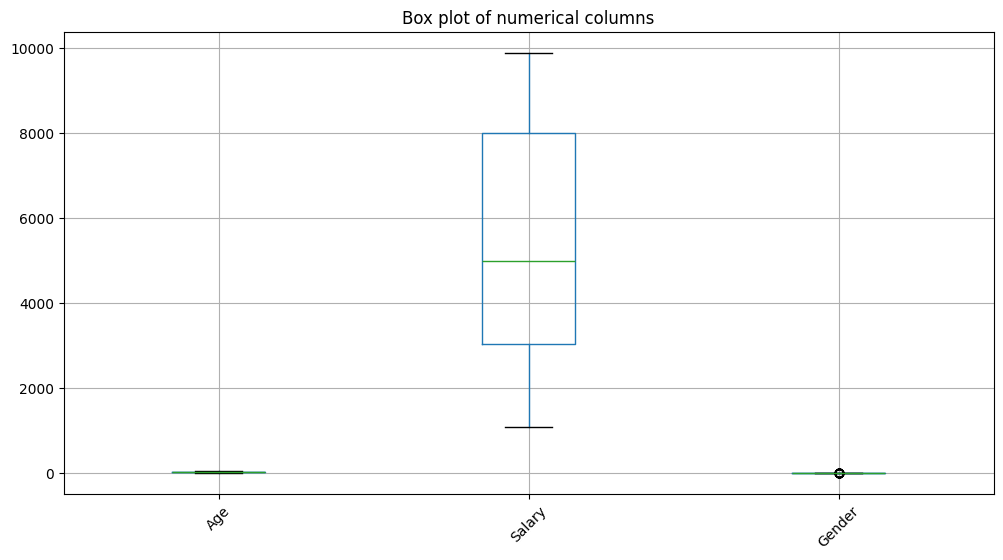

In [66]:
plt.figure(figsize=(12,6))
df.boxplot()
plt.title('Box plot of numerical columns')
plt.xticks(rotation=45)
plt.show()

## Data Cleaning

In [67]:
df['Age'].isnull().value_counts()

Age
False    127
True      17
Name: count, dtype: int64

### Replace 0 in age as NaN

In [68]:
value_counts=(df['Age']==0).value_counts()
value_counts

Age
False    138
True       6
Name: count, dtype: int64

In [69]:
#replacing 0 with nan
df['Age']=df['Age'].replace(0,np.nan)
df


C:\Users\Siraj P\AppData\Local\Temp\ipykernel_3588\1490714513.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].replace(0,np.nan)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [70]:
mean_age=math.ceil(df['Age'].mean())
mean_age

33

In [71]:
#Replace NAN in the "Age" column with mean value
df['Age']=df['Age'].replace(np.NaN,mean_age)
df

C:\Users\Siraj P\AppData\Local\Temp\ipykernel_3588\814238031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age']=df['Age'].replace(np.NaN,mean_age)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [72]:
mode=df['Company'].mode()[0]
mode

'TCS'

In [73]:
#coverting NaN in the "Company" column with mode
df['Company']=df['Company'].replace(np.NaN,mode)
df

C:\Users\Siraj P\AppData\Local\Temp\ipykernel_3588\2257722814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Company']=df['Company'].replace(np.NaN,mode)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [74]:
df['Salary'].isnull().value_counts()

Salary
False    121
True      23
Name: count, dtype: int64

In [75]:
#finding mean to fill the missing values
mean_salary=df['Salary'].mean()
mean_salary

5283.471074380165

In [76]:
#changing the NaN in the "Salary" column with mean value
df['Salary']=df['Salary'].replace(np.NaN,mean_salary)
df

C:\Users\Siraj P\AppData\Local\Temp\ipykernel_3588\2482895645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Salary']=df['Salary'].replace(np.NaN,mean_salary)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


In [77]:
Mode=df['City'].mode()[0]
Mode

'Mumbai'

In [78]:
#changing NaN in the 'City' column with mode
df['City']=df['City'].replace(np.NaN,Mode)
df

C:\Users\Siraj P\AppData\Local\Temp\ipykernel_3588\2350363302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City']=df['City'].replace(np.NaN,Mode)


,Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5283.471074,Chennai,India,0
1,Infosys,30.0,5283.471074,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.000000,Mumbai,India,0
143,TCS,33.0,9024.000000,Calcutta,India,1
145,Infosys,44.0,4034.000000,Delhi,India,1
146,TCS,33.0,5034.000000,Mumbai,India,1


### Data Analysis

In [79]:
# Filtering data with Age>40 AND Salary<5000
filtd_data=df[(df['Age']>40) & (df['Salary']<5000)]
filtd_data

,Company,Age,Salary,City,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


#### plotting chart with Age and Salary

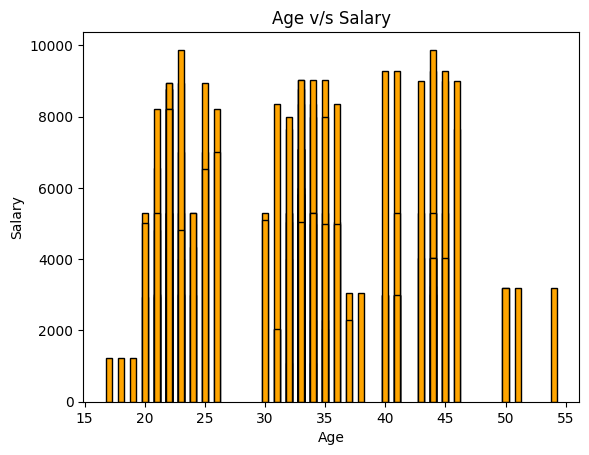

<Figure size 600x300 with 0 Axes>

In [80]:
plt.bar(df['Age'],df['Salary'],color='orange',width=0.5,edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age v/s Salary')
plt.figure(figsize=(6,3))
plt.show()

#### counting the number of employees in each place and plotting it

In [81]:
emplo_count=df['City'].value_counts()
emplo_count

City
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

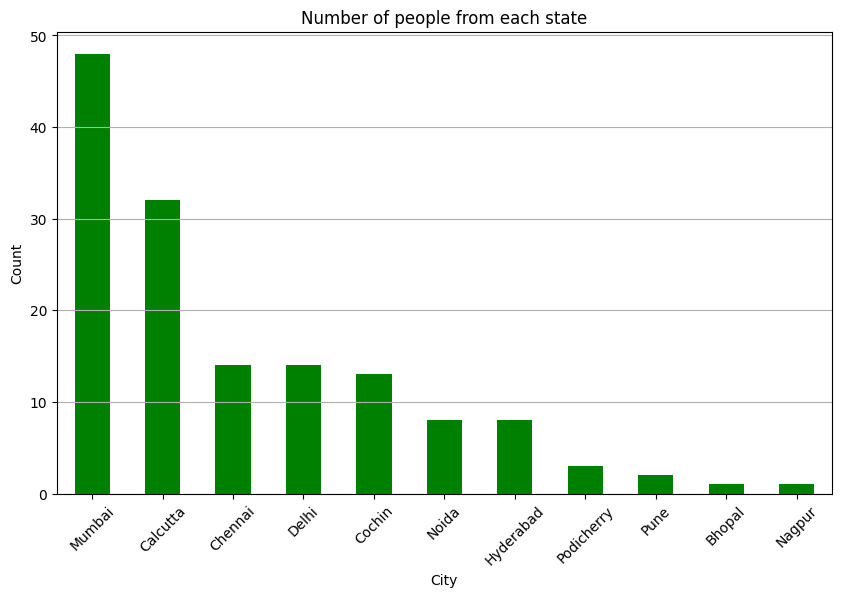

In [82]:
emplo_count.plot(kind='bar',figsize=(10,6),color='green')
plt.title('Number of people from each state')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Data Encoding

#### Converting categorical variables into numerical representations using techniques such as one-hot encoding & label encoding, making them suitable for analysis by machine learning algorithms.

#### Here the categorical variables are coming under 'Company','Place','Country'. We have to convert those categorical variables into numerical variables

### 1.One-Hot Encoding

In [83]:
#Here we are using get_dummies function
df_onehot_encod=pd.get_dummies(data=df,columns=["Company","City","Country"])
print(df_onehot_encod)

      Age       Salary  Gender  Company_CTS  Company_Congnizant  \
0    20.0  5283.471074       0        False               False   
1    30.0  5283.471074       0        False               False   
2    35.0  2300.000000       0        False               False   
3    40.0  3000.000000       0        False               False   
4    23.0  4000.000000       0        False               False   
..    ...          ...     ...          ...                 ...   
142  22.0  8202.000000       0        False               False   
143  33.0  9024.000000       1        False               False   
145  44.0  4034.000000       1        False               False   
146  33.0  5034.000000       1        False               False   
147  22.0  8202.000000       0        False               False   

     Company_Infosys  Company_Infosys Pvt Lmt  Company_TCS  \
0              False                    False         True   
1               True                    False        False   
2        

##### Each unique value in Company,state & Country columns have been converted into a new binary column where False represent 0 and True represent 1

In [84]:
pip install scikit-learn

In [85]:
pip show scikit=learn

Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install --upgrade pip

In [87]:
pip install scikit-learn

In [89]:
#using OneHot Encoder Function
from sklearn.preprocessing import OneHotEncoder
colmn_to_encode=["Company","City","Country"]
new_encoded_colmn=[]

#Create a list of new columns names
for colmn in colmn_to_encode:
    new_encoded_colmn += [f" is_{category}" for category in df[colmn].unique().tolist()]
print(new_encoded_colmn)
#Initalize and Fit One Hot Encoder class from sklearn
one_hot_encoder=OneHotEncoder(sparse_output = False,handle_unknown= 'ignore')
encoded_colmn=one_hot_encoder.fit_transform(df[colmn_to_encode])
print(encoded_colmn)

#As the output of the above transformer will be a sparse matrix, we need to convert it back to Pandas dataframe
df_encoded=pd.DataFrame(encoded_colmn,columns=new_encoded_colmn)
print(df_encoded)
df_onehot_encod=df.join(df_encoded)
print(df_onehot_encod)


[' is_TCS', ' is_Infosys', ' is_CTS', ' is_Tata Consultancy Services', ' is_Congnizant', ' is_Infosys Pvt Lmt', ' is_Chennai', ' is_Mumbai', ' is_Calcutta', ' is_Delhi', ' is_Podicherry', ' is_Cochin', ' is_Noida', ' is_Hyderabad', ' is_Bhopal', ' is_Nagpur', ' is_Pune', ' is_India']
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]
      is_TCS   is_Infosys   is_CTS   is_Tata Consultancy Services  \
0        0.0          0.0      0.0                            0.0   
1        0.0          0.0      1.0                            0.0   
2        0.0          0.0      0.0                            0.0   
3        0.0          0.0      1.0                            0.0   
4        0.0          0.0      0.0                            0.0   
..       ...          ...      ...                            ...   
139      0.0          0.0      0.0                            1.0   
140    

### 2.Label Encoding

In [92]:
from sklearn.preprocessing import LabelEncoder
colmn_to_encode=["Company","City","Country"]
#label_encoder is the object of LabelEncode
label_encoder=LabelEncoder()
#creating a new DataFrame to store the encoded columns
df_label_encoded=df.copy()
#encode each column in  colmn_to_encode
for column in colmn_to_encode:
    df_label_encoded[column]=label_encoder.fit_transform(df[column])
print(df_label_encoded)

     Company   Age       Salary  City  Country  Gender
0          4  20.0  5283.471074     2        0       0
1          2  30.0  5283.471074     6        0       0
2          4  35.0  2300.000000     1        0       0
3          2  40.0  3000.000000     4        0       0
4          4  23.0  4000.000000     6        0       0
..       ...   ...          ...   ...      ...     ...
142        3  22.0  8202.000000     6        0       0
143        4  33.0  9024.000000     1        0       1
145        2  44.0  4034.000000     4        0       1
146        4  33.0  5034.000000     6        0       1
147        2  22.0  8202.000000     3        0       0

[144 rows x 6 columns]


## Feature Scaling

#### Feature scaling is a technique used in machine learning and data preprocessing to standardize the range of independent variables or features in the dataset. The goal of feature scaling is to ensure that all features contribute equally to the analysis and modeling process, preventing features with larger scales from dominating those with smaller scales.

### 1.Standard Scaler

In [94]:
from sklearn.preprocessing import StandardScaler

column_to_scale=df[['Age','Salary']]

#Create a scaler object
scaler=StandardScaler()

#Fit the scaler on the data
scaler.fit(column_to_scale)

#Transform the data
scaled_data=scaler.transform(column_to_scale)

#Convert scaled data to DataFrame
scaled_df=pd.DataFrame(scaled_data, columns=['Age','Salary'])

#Initialize a new DataFrame to store after applying standard scaler
df_standard=df.copy()

#convert scaled columns in the original DataFrame
df_standard[['Age','Salary']]=scaled_df

#Print the DataFrame with scaled columns replaced by original values
print(df_standard)

             Company       Age    Salary      City Country  Gender
0                TCS -1.484676  0.000000   Chennai   India       0
1            Infosys -0.267174  0.000000    Mumbai   India       0
2                TCS  0.341577 -1.264122  Calcutta   India       0
3            Infosys  0.950328 -0.967526     Delhi   India       0
4                TCS -1.119426 -0.543818    Mumbai   India       0
..               ...       ...       ...       ...     ...     ...
142  Infosys Pvt Lmt  0.098077 -0.105703    Mumbai   India       0
143              TCS -1.241176  1.236606  Calcutta   India       1
145          Infosys       NaN       NaN     Delhi   India       1
146              TCS       NaN       NaN    Mumbai   India       1
147          Infosys       NaN       NaN    Cochin   India       0

[144 rows x 6 columns]


#### DataFrame after label encoding and Standard Scaling

In [95]:
#Initialize a new DataFrame to store after applying Standard Scaler
df_standard=df_label_encoded.copy()

#Replace scaled columns in the original DataFrame
df_standard[['Age','Salary']]=scaled_df
#Print the DataFrame with scaled columns replaced by original values
print(df_standard)

     Company       Age    Salary  City  Country  Gender
0          4 -1.484676  0.000000     2        0       0
1          2 -0.267174  0.000000     6        0       0
2          4  0.341577 -1.264122     1        0       0
3          2  0.950328 -0.967526     4        0       0
4          4 -1.119426 -0.543818     6        0       0
..       ...       ...       ...   ...      ...     ...
142        3  0.098077 -0.105703     6        0       0
143        4 -1.241176  1.236606     1        0       1
145        2       NaN       NaN     4        0       1
146        4       NaN       NaN     6        0       1
147        2       NaN       NaN     3        0       0

[144 rows x 6 columns]


#### DataFrame after OneHotEncding and Standard Scaling

In [96]:
#Initialize a new DataFrame to store after applying Standard Scaler.
df_standard=df_onehot_encod.copy()

#Replace scaled columns in the original DataFrame
df_standard[['Age','Salary']]=scaled_df

#Print the DataFrame with scaled columns replaced by original values
print(df_standard)


             Company       Age    Salary      City Country  Gender   is_TCS  \
0                TCS -1.484676  0.000000   Chennai   India       0      0.0   
1            Infosys -0.267174  0.000000    Mumbai   India       0      0.0   
2                TCS  0.341577 -1.264122  Calcutta   India       0      0.0   
3            Infosys  0.950328 -0.967526     Delhi   India       0      0.0   
4                TCS -1.119426 -0.543818    Mumbai   India       0      0.0   
..               ...       ...       ...       ...     ...     ...      ...   
142  Infosys Pvt Lmt  0.098077 -0.105703    Mumbai   India       0      0.0   
143              TCS -1.241176  1.236606  Calcutta   India       1      0.0   
145          Infosys       NaN       NaN     Delhi   India       1      NaN   
146              TCS       NaN       NaN    Mumbai   India       1      NaN   
147          Infosys       NaN       NaN    Cochin   India       0      NaN   

      is_Infosys   is_CTS   is_Tata Consultancy Ser

### MinMax Scaler

In [97]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

column_to_scale=df[['Age','Salary']]

#Create a scaler object
scaler=MinMaxScaler()

#Fit the scaler on the data
scaler.fit(column_to_scale)

#Transform the data
scaled_data=scaler.transform(column_to_scale)

#Convert scaled data to DataFrame
scaled_df=pd.DataFrame(scaled_data, columns=['Age','Salary'])

#Initialize a new DataFrame to store after applying standard scaler
df_minmax=df.copy()

#convert scaled columns in the original DataFrame
df_minmax[['Age','Salary']]=scaled_df

#Print the DataFrame with scaled columns replaced by original values
print(df_minmax)





             Company       Age    Salary      City Country  Gender
0                TCS  0.081081  0.477350   Chennai   India       0
1            Infosys  0.351351  0.477350    Mumbai   India       0
2                TCS  0.486486  0.137817  Calcutta   India       0
3            Infosys  0.621622  0.217480     Delhi   India       0
4                TCS  0.162162  0.331285    Mumbai   India       0
..               ...       ...       ...       ...     ...     ...
142  Infosys Pvt Lmt  0.432432  0.448959    Mumbai   India       0
143              TCS  0.135135  0.809491  Calcutta   India       1
145          Infosys       NaN       NaN     Delhi   India       1
146              TCS       NaN       NaN    Mumbai   India       1
147          Infosys       NaN       NaN    Cochin   India       0

[144 rows x 6 columns]


#### DataFrame after label encoding and minmax scaling

In [99]:
#Initialize a new DataFrame to store after applying Standard Scaler.
df_minmax=df_label_encoded.copy()

#Replace scaled columns in the original DataFrame
df_minmax[['Age','Salary']]=scaled_df

#Print the DataFrame with scaled columns replaced by original values
print(df_minmax)


     Company       Age    Salary  City  Country  Gender
0          4  0.081081  0.477350     2        0       0
1          2  0.351351  0.477350     6        0       0
2          4  0.486486  0.137817     1        0       0
3          2  0.621622  0.217480     4        0       0
4          4  0.162162  0.331285     6        0       0
..       ...       ...       ...   ...      ...     ...
142        3  0.432432  0.448959     6        0       0
143        4  0.135135  0.809491     1        0       1
145        2       NaN       NaN     4        0       1
146        4       NaN       NaN     6        0       1
147        2       NaN       NaN     3        0       0

[144 rows x 6 columns]


#### DataFrame after OneHotEncoding & MinMax Scaling

In [100]:
#Initialize a new DataFrame to store after applying Standard Scaler.
df_minmax=df_onehot_encod.copy()

#Replace scaled columns in the original DataFrame
df_minmax[['Age','Salary']]=scaled_df

#Print the DataFrame with scaled columns replaced by original values
print(df_minmax)



             Company       Age    Salary      City Country  Gender   is_TCS  \
0                TCS  0.081081  0.477350   Chennai   India       0      0.0   
1            Infosys  0.351351  0.477350    Mumbai   India       0      0.0   
2                TCS  0.486486  0.137817  Calcutta   India       0      0.0   
3            Infosys  0.621622  0.217480     Delhi   India       0      0.0   
4                TCS  0.162162  0.331285    Mumbai   India       0      0.0   
..               ...       ...       ...       ...     ...     ...      ...   
142  Infosys Pvt Lmt  0.432432  0.448959    Mumbai   India       0      0.0   
143              TCS  0.135135  0.809491  Calcutta   India       1      0.0   
145          Infosys       NaN       NaN     Delhi   India       1      NaN   
146              TCS       NaN       NaN    Mumbai   India       1      NaN   
147          Infosys       NaN       NaN    Cochin   India       0      NaN   

      is_Infosys   is_CTS   is_Tata Consultancy Ser